In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# rolling hash Function
def get_int(x, base = 128):
    """
    Returns the integer value of a string
    using a specific base
    Input: 
    x: a string
    base: the base of the integer we want to 
    convert it into. Default is 128
    """

    int_x = 0
    n = len(x)-1

    # the first digit is the most significant digit
    # so will be multiplied by len(x)-1
    # the next letters are lesser significant
    for i in range(len(x)):
        int_x += ord(x[i])*base**n
        n -= 1

    return int_x 

In [10]:
get_int('day')

1650937

In [11]:
print(get_int('aaaaa'))
ord('z'), ord('A')

26243264737


(122, 65)

In [0]:
def rh_get_match(x, y, k):
    """
    Finds all common length-k substrings of x and y
    using rolling hashing on both strings.
    Input:
    - x, y: strings
    - k: int, length of substring
    Output:
    - A list of tuples (i, j) where x[i:i+k] = y[j:j+k]
    """
    base = 128
    size = max(len(x)**2 - 1, 10**6 + 3)
    hash_table = [[] for i in range(size)]

    if(k > len(x) or k > len(y)):
        print('Warning: substring length is larger than the string length')
        return []
        
    # hash function to hash item and store accordingly
    key = get_int(x[:k]) % size
    hash_table[key].append((0, x[:k]))

    new_key = key
    for i in range(len(x)-k):
        
        # adding the next letter
        new_key = (new_key * base + ord(x[k+i])) % size

        # removing the first letter
        new_key = (new_key - ord(x[i])*(base**k % size) ) % size

        # store the item at corresponding slot
        hash_table[new_key].append((i+1, x[i+1: k+i+1]))

    common_string = []

    ### checking with the substrings of y

    # compute the hash value for first substring in y
    checking_key = get_int(y[:k]) % size
    
    # if any tuple exist in the slot, go through all the stored tuple
    # and check their 2nd element, if match, take their 'x-index' from the
    # first element and store it with 'y-index'.
    if(hash_table[checking_key]):

        for j in range(0, len(hash_table[checking_key])):
            stored_word = hash_table[checking_key][j]
            if stored_word[1] == y[:k]:

                common_string.append((stored_word[0], 0))

    # using rolling hashing to find the hash value for all other substring
    new_key = checking_key
    for i in range(len(y)-k):

        # adding the next letter
        new_key = (new_key * base + ord(y[k+i])) % size

        # removing the first letter
        new_key = (new_key - ord(y[i])*(base**k % size) ) % size


        # if any tuple exist in the slot, go through all the stored tuple
        # and check their 2nd element, if match, take their 'x-index' from the
        # first element and store it with 'y-index'.
        if(hash_table[new_key]):

            for j in range(0, len(hash_table[new_key])):
                stored_word = hash_table[new_key][j]
                if stored_word[1] == y[i+1: k+i+1]:

                    common_string.append((stored_word[0], i+1))

    return common_string
    ## your code here

In [13]:
# test 1
x, y, k = 'todayisourfinalday', 'thisisfriday', 3
print(rh_get_match(x,y,k))


[(2, 9), (15, 9)]


In [14]:
# test 2 - same word
x, y, k = 'stayhometobesafe', 'stayhometobesafe', 3
print(rh_get_match(x,y,k))


[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13)]


In [15]:
# test 3 - same word same letter
x, y, k = 'bbbbbbbb', 'bbbbbbbb', 4
print(rh_get_match(x,y,k))

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]


In [16]:
# test 4 - one string is empty
x, y, k = '','bbbbbbbb', 4
rh_get_match(x,y,k)

[]

In [17]:
# test 5 - the substring length is higher
x, y, k = 'asdfgh','bbbbbbbb', 8
rh_get_match(x,y,k)

[]

#### Regular hashing

In [19]:
# reading the words from the shakespeare file

txt_file = open("t8.shakespeare.txt", "r")
 
entries = txt_file.read().split(' ')
lines = [string.replace('\n', '') for string in entries]
all_text = [line for line in lines if line != '']
print(len(all_text)) # all the word in shakespeare

# joined all word together for using it as a sting
full_text = "".join(x for x in all_text)
full_text[100:200]

896183


'fromtheirLibraryoftheFutureandShakespeareCDROMS.ProjectGutenbergoftenreleasesEtextsthatareNOTplacedi'

In [0]:
import math

def frac(x):
    '''
    returns the fractional value of a float
    '''
    return x - math.floor(x)


In [0]:
import time
# comparing hash function with the previous one

# store the key
multiplication_hash = []
divide_hash = []

# storing hashing time
hash_time = 0
rolling_hash_time = 0

for words in all_text:
    
    # multiplication method
    size = 2**20
    c = (math.sqrt(5) - 1)/2
    start = time.time()
    key = math.floor( size * frac(get_int(words) * c))
    end = time.time()
    hash_time += end - start # increase the time
    multiplication_hash.append(key) # append the key

    # multiplication method
    size = 10**6 + 3
    start = time.time()
    key = get_int(words) % size
    end = time.time()
    rolling_hash_time += end - start # increase the time
    divide_hash.append(key) # append the key
    

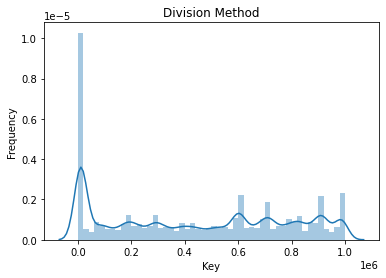

In [26]:
sns.distplot(divide_hash)
plt.xlabel('Key')
plt.ylabel('Frequency')
plt.title('Division Method')
plt.show()

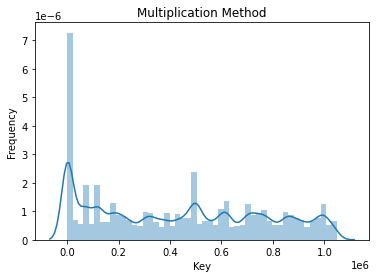

In [27]:
sns.distplot(multiplication_hash)
plt.xlabel('Key')
plt.ylabel('Frequency')
plt.title('Multiplication Method') 
plt.show()

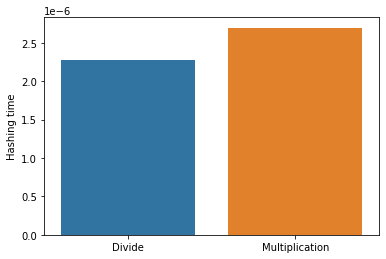

In [28]:
sns.barplot(x = ['Divide', 'Multiplication'], y = [rolling_hash_time/len(all_text), hash_time/len(all_text)])
plt.ylabel('Hashing time')
plt.show()

In [0]:
def regular_get_match(x, y, k):
    """
    Finds all common length-k substrings of x and y
    not using rolling hashing on both strings.
    
    Input:
    - x, y: strings
    - k: int, length of substring
    Output:
    - A list of tuples (i, j) where x[i:i+k] = y[j:j+k]
    """

    # defining base, siz, c and hash table
    base = 128
    size = max(len(x)**2, 2**20)
    c = (math.sqrt(5) - 1)/2
    hash_table = [[] for i in range(size)]
        
    # hash function to hash the all substring and store acc. to the hash value
    for i in range(len(x) - k + 1):

        key = math.floor( size * frac(get_int(x[i: k+i]) * c))
        hash_table[key].append((i, x[i: k+i]))

    common_string = []

    
    ### checking with the substrings of y

    # using regular hashing to find the hash value for all other substring
    for i in range(len(y) - k + 1):
        
        checking_key = math.floor( size * frac(get_int(y[i: k+i]) * c))
        
        # if any tuple exist in the slot, go through all the stored tuple
        # and check their 2nd element, if match, take their 'x-index' from the
        # first element and store it with 'y-index'.
        if(hash_table[checking_key]):

            for j in range(0, len(hash_table[checking_key])):
                stored_word = hash_table[checking_key][j]
                if stored_word[1] == y[i: k+i]:
                    common_string.append((stored_word[0], i))

    return common_string
    ## your code here

In [30]:
# test 1
x, y, k = 'todayisourfinalday', 'thisisfriday', 3
print(regular_get_match(x,y,k))


[(2, 9), (15, 9)]


In [31]:
# test 2 - same word
x, y, k = 'stayhometobesafe', 'stayhometobesafe', 3
print(regular_get_match(x,y,k))


[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13)]


In [32]:
# test 3 - same word same letter
x, y, k = 'bbbbbbbb', 'bbbbbbbb', 4
print(regular_get_match(x,y,k))

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]


In [33]:
# test 4 - one string is empty
x, y, k = '','bbbbbbbb', 4
regular_get_match(x,y,k)

[]

In [34]:
# test 5 - the substring length is higher
x, y, k = 'asdfgh','bbbbbbbb', 8
regular_get_match(x,y,k)

[]

### Testing the algorithm:

In [0]:
import string
import random

# random word generator
def randomword(length):
    '''
    Return random word of given length
    '''
    return ''.join(random.choice(string.ascii_lowercase) for i in range(length))

# same letter word generator
def sameletter(length):
    '''
    Return same letter word of given length
    '''
    letter = random.choice(string.ascii_lowercase)
    return ''.join(letter for i in range(length))

In [47]:
# Testing Random word
x = randomword(10000)
y = randomword(100)
# print(x,y)
k = 3
match = rh_get_match(x,y,k)
print(len(match), match )

57 [(932, 3), (3988, 6), (3775, 8), (5506, 9), (7030, 9), (9257, 9), (868, 10), (9779, 11), (2857, 12), (7575, 12), (7069, 13), (1243, 14), (2653, 24), (3727, 25), (7289, 27), (5670, 28), (9127, 28), (4073, 29), (5651, 29), (1015, 33), (3000, 34), (2076, 35), (3731, 36), (2170, 38), (9771, 38), (8177, 39), (6832, 41), (855, 43), (3303, 44), (7770, 49), (7771, 50), (9569, 56), (9139, 57), (7652, 59), (6505, 60), (5976, 64), (5977, 65), (8795, 65), (830, 66), (713, 70), (8915, 70), (6274, 72), (9995, 73), (7924, 78), (1246, 81), (3800, 82), (4048, 82), (5348, 82), (5349, 83), (6761, 86), (3038, 88), (5166, 88), (6920, 91), (4964, 93), (8826, 93), (5983, 94), (9319, 94)]


In [37]:
## Self generating graphs for experimental complexity

# to store the average time
rolling = [[] for i in range(5)]
regular = [[] for i in range(5)]



iteration = 10
n_list = np.array([100,200,300,400,500,600])
k_list = np.array([10,20,30,40,50,60])

for i in n_list:

    for k in k_list:
        
        # to store the total time
        rolling_hash_time = [0 for i in range(5)]
        regular_hash_time = [0 for i in range(5)]

        # 1 - strings from shakespear
        for _ in range(iteration):
            x = full_text[:i]
            y = full_text[-1*i:]

            # rolling
            start = time.time()
            rh_hash = rh_get_match(x,y,k)
            end = time.time()
            rolling_hash_time[0] += end - start

            # regular
            start = time.time()
            regular_hash = regular_get_match(x,y,k)
            end = time.time()
            regular_hash_time[0] += end - start
        
        rolling[0].append(rolling_hash_time[0]/iteration)
        regular[0].append(regular_hash_time[0]/iteration)


        # 2 - random different string
        for _ in range(iteration):
            x = randomword(i)
            y = randomword(i)

            # rolling
            start = time.time()
            rh_hash = rh_get_match(x,y,k)
            end = time.time()
            rolling_hash_time[1] += end - start

            # regular
            start = time.time()
            regular_hash = regular_get_match(x,y,k)
            end = time.time()
            regular_hash_time[1] += end - start

        rolling[1].append(rolling_hash_time[1]/iteration)
        regular[1].append(regular_hash_time[1]/iteration)


        # 3 - same letters but different string
        for _ in range(iteration):
            x = sameletter(i)
            y = sameletter(i)

            # rolling
            start = time.time()
            rh_hash = rh_get_match(x,y,k)
            end = time.time()
            rolling_hash_time[2] += end - start

            # regular
            start = time.time()
            regular_hash = regular_get_match(x,y,k)
            end = time.time()
            regular_hash_time[2] += end - start

        rolling[2].append(rolling_hash_time[2]/iteration)
        regular[2].append(regular_hash_time[2]/iteration)


        # 4 - random letters but same string
        for _ in range(iteration):
            x = randomword(i)
            y = x

            # rolling
            start = time.time()
            rh_hash = rh_get_match(x,y,k)
            end = time.time()
            rolling_hash_time[3] += end - start

            # regular
            start = time.time()
            regular_hash = regular_get_match(x,y,k)
            end = time.time()
            regular_hash_time[3] += end - start


        rolling[3].append(rolling_hash_time[3]/iteration)
        regular[3].append(regular_hash_time[3]/iteration)

        
        # 5 - same letters and same string
        for _ in range(iteration):
            x = sameletter(i)
            y = x

            # rolling
            start = time.time()
            rh_hash = rh_get_match(x,y,k)
            end = time.time()
            rolling_hash_time[4] += end - start

            # regular
            start = time.time()
            regular_hash = regular_get_match(x,y,k)
            end = time.time()
            regular_hash_time[4] += end - start

        rolling[4].append(rolling_hash_time[4]/iteration)
        regular[4].append(regular_hash_time[4]/iteration)

        print(i,k,'done')

100 10 done
100 20 done
100 30 done
100 40 done
100 50 done
100 60 done
200 10 done
200 20 done
200 30 done
200 40 done
200 50 done
200 60 done
300 10 done
300 20 done
300 30 done
300 40 done
300 50 done
300 60 done
400 10 done
400 20 done
400 30 done
400 40 done
400 50 done
400 60 done
500 10 done
500 20 done
500 30 done
500 40 done
500 50 done
500 60 done
600 10 done
600 20 done
600 30 done
600 40 done
600 50 done
600 60 done


In [39]:
n_list = np.array([100,200,300,400,500,600])
k_list = np.array([10,20,30,40,50,60])

data = pd.DataFrame({'n_string':n_list.repeat(len(k_list)),
                     'n_substring': np.tile(k_list, len(n_list)),
                     'rolling_hash_shakespeare': rolling[0],
                     'rolling_hash_random': rolling[1],
                     'rolling_hash_same_letter': rolling[2],
                     'rolling_hash_random_letter_same_string': rolling[3],
                     'rolling_hash_all_same': rolling[4],
                     'regular_hash_shakespeare': regular[0],
                     'regular_hash_random': regular[1],
                     'regular_hash_same_letter': regular[2],
                     'regular_hash_random_letter_same_string': regular[3],
                     'regular_hash_all_same': regular[4]})

data.head(10)

,n_string,n_substring,rolling_hash_shakespeare,rolling_hash_random,rolling_hash_same_letter,rolling_hash_random_letter_same_string,rolling_hash_all_same,regular_hash_shakespeare,regular_hash_random,regular_hash_same_letter,regular_hash_random_letter_same_string,regular_hash_all_same
0,100,10,0.149645,1.113298,1.074814,1.098026,1.040899,0.263761,1.107779,1.072317,1.101484,1.116465
1,100,20,1.091336,1.067399,1.107872,1.063931,1.132684,1.094993,1.094506,1.083234,1.098153,1.036882
2,100,30,1.173794,1.062755,1.101663,1.068714,1.066527,1.039072,1.094028,1.077752,1.098837,1.067863
3,100,40,1.094339,1.062972,1.098653,1.069543,1.092551,1.078696,1.093497,1.075405,1.099593,0.951923
4,100,50,1.082523,1.060119,1.097650,1.061064,1.103568,1.070330,1.095225,1.073249,1.087418,1.079920
5,100,60,1.159142,1.082593,1.088927,1.218264,1.205882,0.986726,1.081786,1.087108,1.272400,1.089068
6,200,10,1.152632,1.131391,1.183857,1.135494,1.179174,1.123211,1.201992,1.150304,1.075325,1.100085
7,200,20,1.175330,1.104554,1.091192,1.174925,1.163650,1.125665,1.146238,1.195207,1.053647,1.083066
8,200,30,1.150016,1.098204,1.130791,1.150082,1.192970,1.154668,1.112805,1.151776,1.072811,1.003962
9,200,40,1.046148,1.101847,1.111013,1.211793,1.088340,1.226750,1.085921,1.173731,1.008559,1.152257


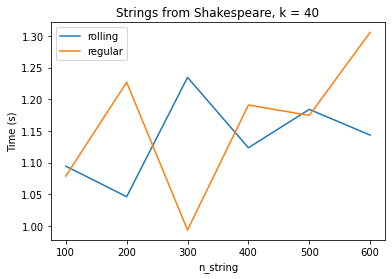

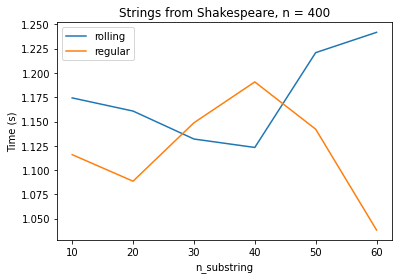

In [40]:
# Strings in shakespeare 

# same k, but different n
sns.lineplot(x = 'n_string', y = 'rolling_hash_shakespeare', data = data[data['n_substring'] == 40], 
             label = 'rolling', palette = 'Greens')
sns.lineplot(x = 'n_string', y = 'regular_hash_shakespeare', data = data[data['n_substring'] == 40], 
             label = 'regular', palette = 'Blues')

plt.title('Strings from Shakespeare, k = 40')
plt.ylabel('Time (s)')
plt.show()

# same n, but different k
sns.lineplot(x = 'n_substring', y = 'rolling_hash_shakespeare', data = data[data['n_string'] == 400], 
             label = 'rolling', palette = 'Greens')
sns.lineplot(x = 'n_substring', y = 'regular_hash_shakespeare', data = data[data['n_string'] == 400], 
             label = 'regular', palette = 'Blues')

plt.title('Strings from Shakespeare, n = 400')
plt.ylabel('Time (s)')
plt.show()

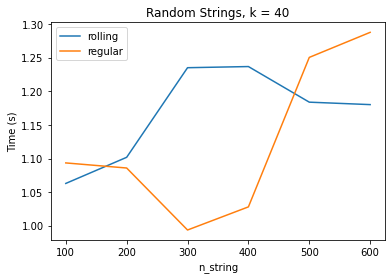

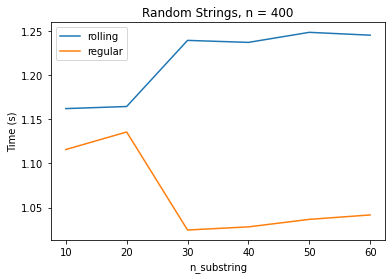

In [41]:
# Random Strings 

# same k, but different n
sns.lineplot(x = 'n_string', y = 'rolling_hash_random', data = data[data['n_substring'] == 40], 
             label = 'rolling')
sns.lineplot(x = 'n_string', y = 'regular_hash_random', data = data[data['n_substring'] == 40], 
             label = 'regular')

plt.title('Random Strings, k = 40')
plt.ylabel('Time (s)')
plt.show()

# same n, but different k
sns.lineplot(x = 'n_substring', y = 'rolling_hash_random', data = data[data['n_string'] == 400], 
             label = 'rolling')
sns.lineplot(x = 'n_substring', y = 'regular_hash_random', data = data[data['n_string'] == 400], 
             label = 'regular')

plt.title('Random Strings, n = 400')
plt.ylabel('Time (s)')
plt.show()

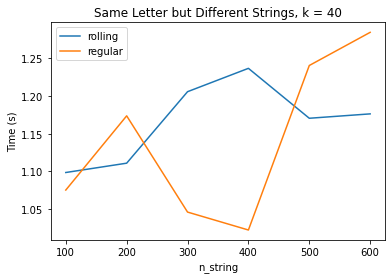

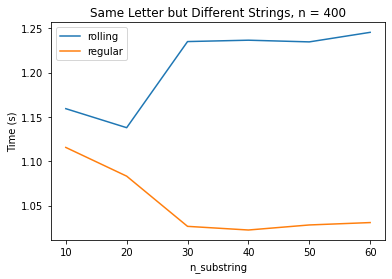

In [42]:
# Same letter different Strings 

# same k, but different n
sns.lineplot(x = 'n_string', y = 'rolling_hash_same_letter', data = data[data['n_substring'] == 40], 
             label = 'rolling')
sns.lineplot(x = 'n_string', y = 'regular_hash_same_letter', data = data[data['n_substring'] == 40], 
             label = 'regular')

plt.title('Same Letter but Different Strings, k = 40')
plt.ylabel('Time (s)')
plt.show()

# same n, but different k
sns.lineplot(x = 'n_substring', y = 'rolling_hash_same_letter', data = data[data['n_string'] == 400], 
             label = 'rolling')
sns.lineplot(x = 'n_substring', y = 'regular_hash_same_letter', data = data[data['n_string'] == 400], 
             label = 'regular')

plt.title('Same Letter but Different Strings, n = 400')
plt.ylabel('Time (s)')
plt.show()

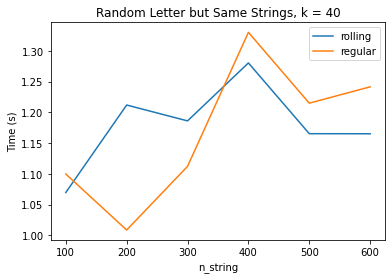

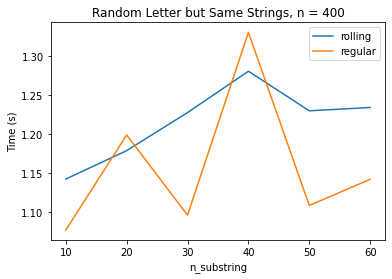

In [43]:
# Random Letter but Same Strings

# same k, but different n
sns.lineplot(x = 'n_string', y = 'rolling_hash_random_letter_same_string', data = data[data['n_substring'] == 40], 
             label = 'rolling', palette = 'Greens')
sns.lineplot(x = 'n_string', y = 'regular_hash_random_letter_same_string', data = data[data['n_substring'] == 40], 
             label = 'regular')

plt.title('Random Letter but Same Strings, k = 40')
plt.ylabel('Time (s)')
plt.show()

# same n, but different k
sns.lineplot(x = 'n_substring', y = 'rolling_hash_random_letter_same_string', data = data[data['n_string'] == 400], 
             label = 'rolling', palette = 'Greens')
sns.lineplot(x = 'n_substring', y = 'regular_hash_random_letter_same_string', data = data[data['n_string'] == 400], 
             label = 'regular')

plt.title('Random Letter but Same Strings, n = 400')
plt.ylabel('Time (s)')
plt.show()

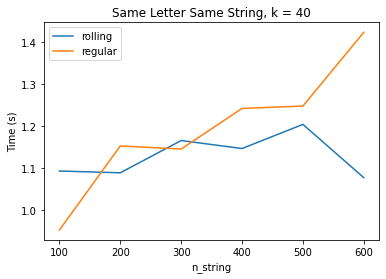

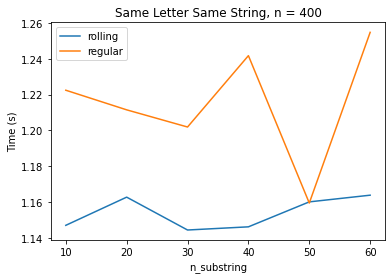

In [46]:
# Same Letter Same Stringss 

# same k, but different n
sns.lineplot(x = 'n_string', y = 'rolling_hash_all_same', data = data[data['n_substring'] == 40], 
             label = 'rolling', palette = 'Greens')
sns.lineplot(x = 'n_string', y = 'regular_hash_all_same', data = data[data['n_substring'] == 40], 
             label = 'regular')

plt.title('Same Letter Same String, k = 40')
plt.ylabel('Time (s)')
plt.show()

# same n, but different k
sns.lineplot(x = 'n_substring', y = 'rolling_hash_all_same', data = data[data['n_string'] == 400], 
             label = 'rolling', palette = 'Greens')
sns.lineplot(x = 'n_substring', y = 'regular_hash_all_same', data = data[data['n_string'] == 400], 
             label = 'regular')

plt.title('Same Letter Same String, n = 400')
plt.ylabel('Time (s)')
plt.show()

In [0]:
data.to_csv('hashing_data_2.csv')